## Market segmentation

### Import the relevant libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [5]:
raw_data = pd.read_csv("3.12. Example.csv")
raw_data.head(5)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Plot the data

Text(0, 0.5, 'Loyalty')

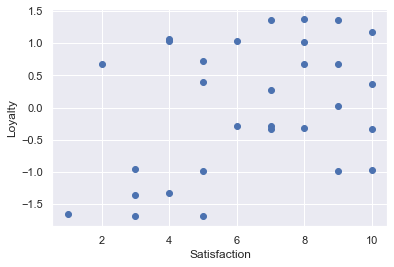

In [6]:
plt.scatter(raw_data["Satisfaction"],raw_data["Loyalty"])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")

### Standardize the variables

In [9]:
from sklearn import preprocessing
x = raw_data.copy()
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

###  Find cluster size using elbow method

In [10]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)
    
# Check the result   
wcss

C:\Users\Channa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 30.352360588087745,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.326631124753926,
 4.337110750237059,
 4.018702179647256]

Text(0, 0.5, 'WCSS')

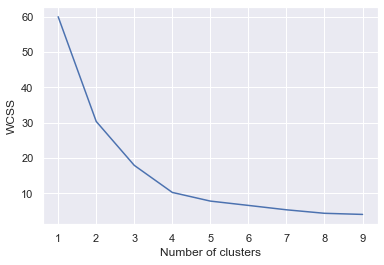

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [12]:
# base on result cluster size 4 suitable
kmean = KMeans(4)
kmean.fit(x_scaled)
data_with_clusters = raw_data.copy()
data_with_clusters["Clusters"] = kmean.fit_predict(x_scaled)

In [13]:
data_with_clusters.head()

,Satisfaction,Loyalty,Clusters
0,4,-1.33,2
1,6,-0.28,0
2,5,-0.99,2
3,7,-0.29,0
4,4,1.06,1


Text(0, 0.5, 'Loyalty')

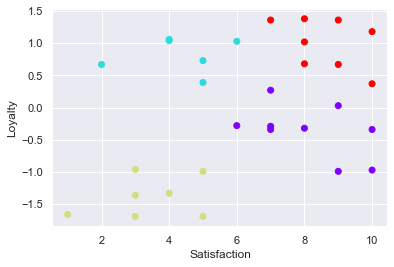

In [14]:
plt.scatter(data_with_clusters["Satisfaction"],data_with_clusters["Loyalty"],c= data_with_clusters["Clusters"],cmap= "rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")